In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\N3ur0m0nk\\Documents\\LR6\\Данные.csv', sep='\t')

In [3]:
df['balcony'] = df['balcony'].fillna(0)

In [4]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [5]:
df['living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])

In [6]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])

In [7]:
area_price = len(df) * [0.0]

In [8]:
for i in range(len(df)):
    area_price[i] = df['last_price'].loc[df.index[i]] / df['total_area'].loc[df.index[i]]

In [9]:
df.insert(22, 'area_price', area_price)

In [10]:
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [11]:
floor_name = len(df) * [0]

In [12]:
for i in range(len(df)):
    if df['floor'].loc[df.index[i]] == 1:
        floor_name[i] = 'Первый'
    elif df['floor'].loc[df.index[i]] == df['floors_total'].loc[df.index[i]]:
        floor_name[i] = 'Последний'
    else:
        floor_name[i] = 'Другой'

In [13]:
df.insert(26, 'floor_name', floor_name)

In [14]:
for i in range(len(df)):
    df['living_ratio'] = df['living_area'] / df['total_area']
    df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

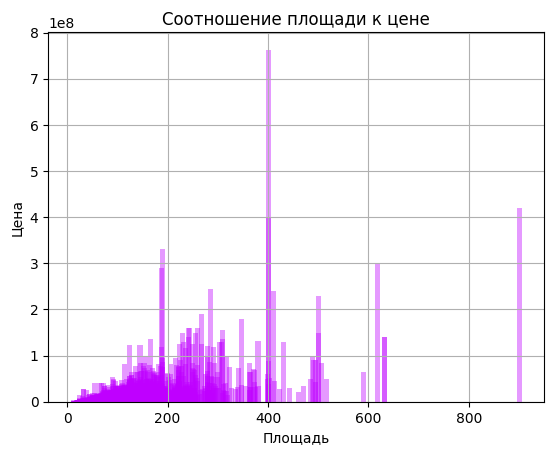

In [15]:
plt.bar(df['total_area'], df['last_price'], width = 10, alpha = 0.4, color = '#BF00FF')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Соотношение площади к цене')
plt.grid()
plt.show()

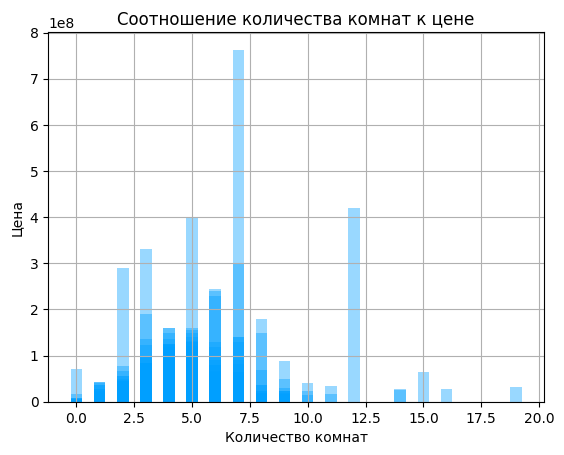

In [16]:
plt.bar(df['rooms'], df['last_price'], width = 0.5, alpha = 0.4, color = '#009FFF')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.title('Соотношение количества комнат к цене')
plt.grid()
plt.show()

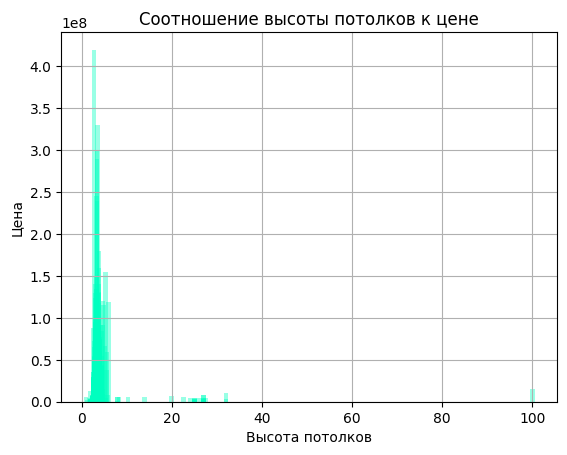

In [17]:
plt.bar(df['ceiling_height'], df['last_price'], width = 1, alpha = 0.4, color = '#00FFBF')
plt.xlabel('Высота потолков')
plt.ylabel('Цена')
plt.title('Соотношение высоты потолков к цене')
plt.grid()
plt.show()

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

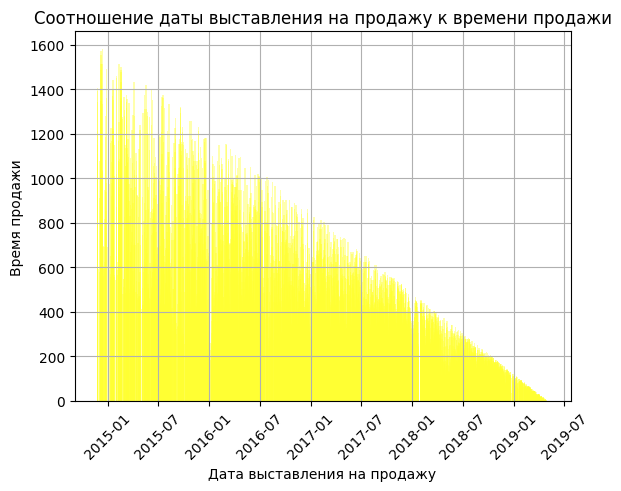

In [19]:
plt.bar(df['first_day_exposition'], df['days_exposition'], width = 5, alpha = 0.4, color = '#FFFF33')
plt.xticks(rotation = 45)
plt.xlabel('Дата выставления на продажу')
plt.ylabel('Время продажи')
plt.title('Соотношение даты выставления на продажу к времени продажи')
plt.grid()
plt.show()

In [21]:
df.to_csv('Данные-дополненные.csv')